In [1]:
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

# I. Dynamic Time Warping Algo

In [2]:
def cal_distance_matrix(x, y):
    '''To calculate the distance matrix between two signals (x and y)
    Input:
        x: a np array of length M
        y: a np array of length N
    Output
        distance matrix with shape[M, N]
    '''
    M, N = x.shape[0], y.shape[0]
    distance_matrix = np.zeros((M, N))
    for r in range(M):
        for c in range(N):
            distance_matrix[r, c] = abs(x[r] - y[c])
    return distance_matrix

In [3]:
def cal_cost_matrix(distance_matrix):
    '''
    To find a path with minimum-cost through the distance matrix using dynamic programming.
    Input:
        distance_matrix with shape [M, N]
    Output:
        cost_matrix with shape [M, N] and a path of minimum cost    
    '''
    M, N = distance_matrix.shape
    
    # Initialize cost matrix
    cost_matrix = np.zeros((M + 1, N + 1))
    for r in range(1, M + 1):
        cost_matrix[r, 0] = np.inf
    for c in range(1, N + 1):
        cost_matrix[0, c] = np.inf
        
    # Calculate the cost_matrix while keeping the path
    traceback_matrix = np.zeros((M, N))
    for r in range(M):
        for c in range(N):
            costs = [
                cost_matrix[r, c],     # match: 0
                cost_matrix[r, c + 1], # insertion: 1
                cost_matrix[r + 1, c]  # deletion: 2
            ]
            idx_min_costs = np.argmin(costs)
            cost_matrix[r + 1, c + 1] = distance_matrix[r, c] + costs[idx_min_costs]
            traceback_matrix[r, c] = idx_min_costs
    # End of for r
    
    # Traceback from BOTTOM RIGHT
    r = M - 1
    c = N - 1
    path = [(r, c)]
    while r > 0 or c > 0:
        traceback_type = traceback_matrix[r, c]        
        if traceback_type == 0: # match
            r -= 1
            c -= 1
        elif traceback_type == 1: # insertion
            r -= 1
        elif traceback_type == 2: # deletion
            c -= 1
        # End of if
        path.append((r, c))
    # End of while
    cost_matrix = cost_matrix[1:, 1:]       
    return cost_matrix, path

### Test

In [4]:
x = np.array([1, 3, 9, 2, 1, 3, 9, 9])
y = np.array([2, 0, 0, 9, 1, 7])

cal_cost_matrix(distance_matrix=cal_distance_matrix(x, y))

(array([[ 1.,  2.,  3., 11., 11., 17.],
        [ 2.,  4.,  5.,  9., 11., 15.],
        [ 9., 11., 13.,  5., 13., 13.],
        [ 9., 11., 13., 12.,  6., 11.],
        [10., 10., 11., 19.,  6., 12.],
        [11., 13., 13., 17.,  8., 10.],
        [18., 20., 22., 13., 16., 10.],
        [25., 27., 29., 13., 21., 12.]]),
 [(7, 5), (6, 5), (5, 4), (4, 4), (3, 4), (2, 3), (1, 2), (0, 1), (0, 0)])

# II. DTW for 1D data

## II.1. DTW

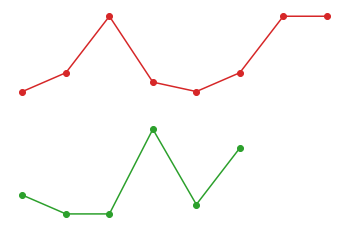

In [5]:
x = np.array([1, 3, 9, 2, 1, 3, 9, 9])
y = np.array([2, 0, 0, 9, 1, 7])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 12, '-o', c='C3')
plt.plot(np.arange(y.shape[0]), y, '-o', c='C2')
plt.axis('off')
plt.show()

In [6]:
# Calculate distance matrix
distance_matrix = cal_distance_matrix(x, y)

# Calculate the cost matrix and path
M, N = distance_matrix.shape
cost_matrix, path = cal_cost_matrix(distance_matrix)
print("Alignment cost: {:.4f}".format(cost_matrix[M - 1, N - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_matrix[M - 1, N - 1]/(M + N)))

Alignment cost: 12.0000
Normalized alignment cost: 0.8571


#### Visualize the distance matrix and the cost matrix

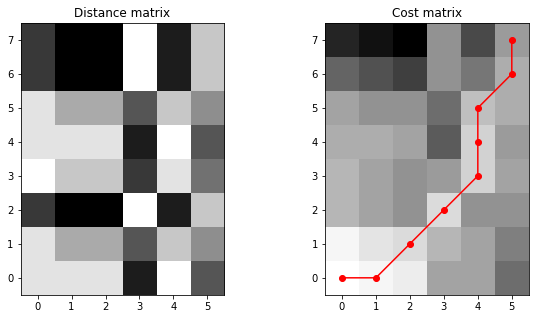

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(distance_matrix, 
           cmap=plt.cm.binary, 
           interpolation="nearest", 
           origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_matrix, 
           cmap=plt.cm.binary, 
           interpolation="nearest", 
           origin="lower")

x_path, y_path = zip(*path)
plt.plot(y_path, x_path, marker='o', color='r');

#### Visualize matching points

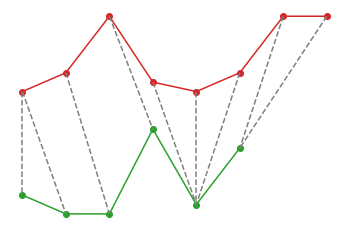

In [8]:
plt.plot(np.arange(x.shape[0]), x + 12, '-o', c='C3')
plt.plot(np.arange(y.shape[0]), y, '-o', c='C2')
for x_r, y_c in path:
    plt.plot([x_r, y_c], [x[x_r] + 12, y[y_c]], '--', c='C7')
plt.axis('off')
plt.show()

## II.2 Ranking 


Alignment cost: 0.5000
Normalized alignment cost: 0.0208

Alignment cost: 2.5000
Normalized alignment cost: 0.1042

Alignment cost: 1.7500
Normalized alignment cost: 0.0972


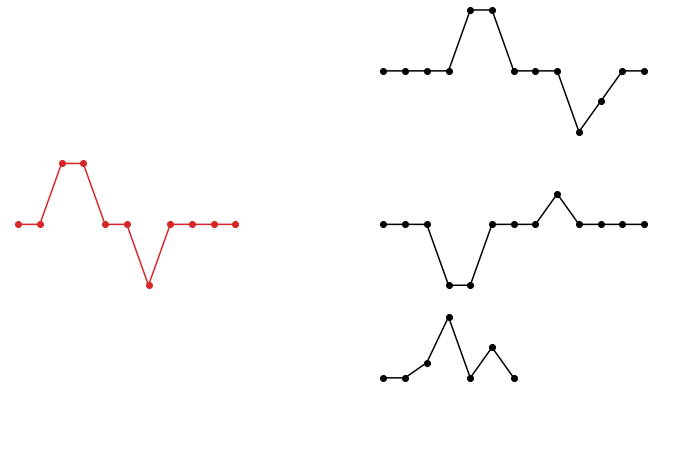

In [9]:
x = np.array([ 0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])
z = np.array([0, 0, 0, -1, -1, 0, 0, 0, 0.5, 0, 0, 0, 0])
w = np.array([0, 0, 0.25, 1, 0, 0.5, 0])

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(323)  # 3x2 subplots at 3 position
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(326)
ax1.plot(np.arange(x.shape[0]), x, "-o", c="C3")
ax2.plot(np.arange(y.shape[0]), y, "-o", c="k")
ax3.plot(np.arange(z.shape[0]), z, "-o", c="k")
ax4.plot(np.arange(w.shape[0]), w, "-o", c="k")
for ax in [ax1, ax2, ax3, ax4]:
    ax.axis("off")
    ax.set_xlim([-0.5, 13.5])
    ax.set_ylim([-1.05, 1.05])
    
for signal in [y, z, w]:
    # Distance matrix    
    M = x.shape[0]
    N = signal.shape[0]
    distance_matrix = cal_distance_matrix(x, signal)
    # DTW
    cost_matrix, path = cal_cost_matrix(distance_matrix)
    print("\nAlignment cost: {:.4f}".format(cost_matrix[M - 1, N - 1]))
    print("Normalized alignment cost: {:.4f}".format(cost_matrix[M - 1, N - 1]/(M + N)))


# III. DTW for 2D data

## III.1. Hello examples: One word

In [10]:
import librosa
from scipy.io import wavfile
from IPython.display import Audio

In [11]:
f_s, x = wavfile.read("data/hello1.wav")
Audio(rate=f_s, data=x)

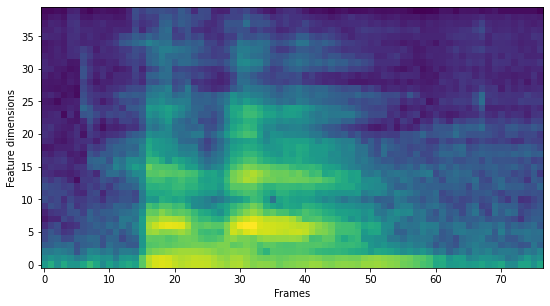

In [12]:
# Mel-scale spectrogram
n_fft = int(0.025*f_s)      # 25 ms
hop_length = int(0.01*f_s)  # 10 ms
mel_spec_x = librosa.feature.melspectrogram(x/1.0, 
                                            sr=f_s, 
                                            n_mels=40,
                                            n_fft=n_fft, 
                                            hop_length=hop_length)
log_mel_spec_x = np.log(mel_spec_x)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(log_mel_spec_x, 
          origin="lower", 
          interpolation="nearest");
plt.ylabel("Feature dimensions")
plt.xlabel("Frames");

In [13]:
f_s, y = wavfile.read("data/hello2.wav")
Audio(rate=f_s, data=y)

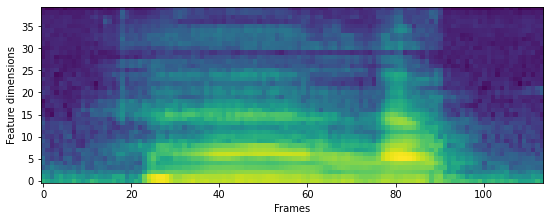

In [14]:
# Mel-scale spectrogram
n_fft = int(0.025*f_s)      # 25 ms
hop_length = int(0.01*f_s)  # 10 ms
mel_spec_y = librosa.feature.melspectrogram(y/1.0, 
                                            sr=f_s, 
                                            n_mels=40,
                                            n_fft=n_fft, 
                                            hop_length=hop_length)
log_mel_spec_y = np.log(mel_spec_y)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(log_mel_spec_y, 
          origin="lower", 
          interpolation="nearest");
plt.ylabel("Feature dimensions")
plt.xlabel("Frames");

In [15]:
x_seq = log_mel_spec_x.T
y_seq = log_mel_spec_y.T
distance_matrix = dist.cdist(x_seq, y_seq, "cosine")
cost_matrix, path = cal_cost_matrix(distance_matrix)
print("Alignment cost: {:.4f}".format(cost_matrix[-1, -1]))
print("Normalized Alignment cost: {:.4f}".format(cost_matrix[-1, -1] / (len(x_seq) + len(y_seq))))

Alignment cost: 0.6059
Normalized Alignment cost: 0.0032


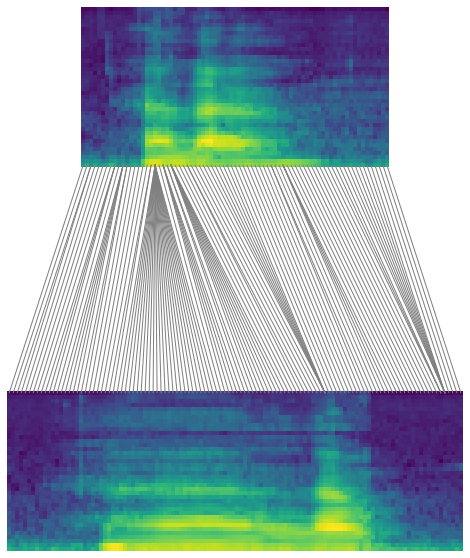

In [16]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(313)

ax1.imshow(log_mel_spec_x, origin="lower", interpolation="nearest")
ax2.imshow(log_mel_spec_y, origin="lower", interpolation="nearest")
ax1.axis("off")
ax2.axis("off")

for x_i, y_j in path:
    con = ConnectionPatch(
        xyA=(x_i, 0), xyB=(y_j, log_mel_spec_y.shape[0] - 1), coordsA="data", coordsB="data",
        axesA=ax1, axesB=ax2, color="C7"
        )
    ax2.add_artist(con)

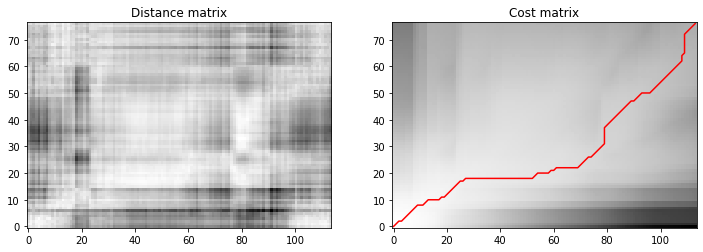

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(distance_matrix, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_matrix, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path, color='r'); # marker='o', 

## IV. DTW Variants  

### 1. Step size conditions

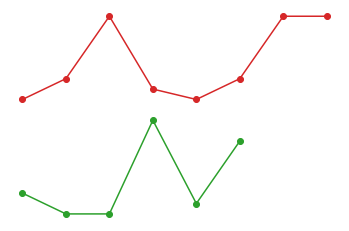

Accumulated cost matrix and optimal warping path for different step size conditions:


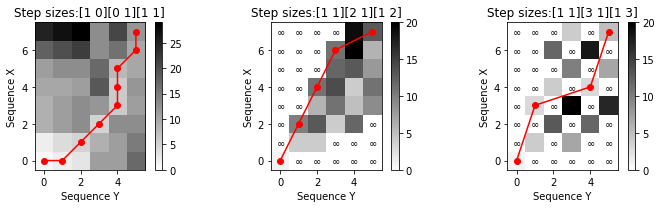

In [18]:
import numpy as np
import scipy.spatial
import librosa
import matplotlib.pyplot as plt
from numba import jit
%matplotlib inline

import sys
sys.path.append('..')
import libfmp.c3

def compute_plot_D_P(X, Y, ax, step_sizes_sigma=np.array([[1, 1], [0, 1], [1, 0]]),
                     weights_mul=np.array([1, 1, 1]), title='',
                     global_constraints=False, band_rad=0.25):
    D, P = librosa.sequence.dtw(X, Y, metric='euclidean', weights_mul=weights_mul,
                    step_sizes_sigma=step_sizes_sigma, 
                    global_constraints=global_constraints, band_rad=band_rad)
    D_max = np.nanmax(D[D != np.inf])
    libfmp.c3.plot_matrix_with_points(D, P, linestyle='-', 
        ax=[ax], aspect='equal', clim=[0, D_max],
        title= title, xlabel='Sequence Y', ylabel='Sequence X');
    for x, y in zip(*np.where(np.isinf(D))):
        plt.text(y, x, '$\infty$', horizontalalignment='center', verticalalignment='center')

X = np.array([1, 3, 9, 2, 1, 3, 9, 9])
Y = np.array([2, 0, 0, 9, 1, 7] )
plt.figure(figsize=(6, 4))
plt.plot(np.arange(X.shape[0]), X + 10, '-o', c='C3')
plt.plot(np.arange(Y.shape[0]), Y, '-o', c='C2')
plt.axis('off')
plt.show()

print(r'Accumulated cost matrix and optimal warping path for different step size conditions:')
plt.figure(figsize=(10, 3))

ax = plt.subplot(1, 3, 1)
step_sizes_sigma = np.array([[1, 0], [0, 1], [1, 1]])
title='Step sizes:'+''.join(str(s) for s in step_sizes_sigma)
compute_plot_D_P(X, Y, ax=ax, step_sizes_sigma=step_sizes_sigma, title=title)

ax = plt.subplot(1, 3, 2)
step_sizes_sigma = np.array([[1, 1], [2, 1], [1, 2]])
title='Step sizes:'+''.join(str(s) for s in step_sizes_sigma)
compute_plot_D_P(X, Y, ax=ax, step_sizes_sigma=step_sizes_sigma, title=title)

ax = plt.subplot(1, 3, 3)
step_sizes_sigma = np.array([[1, 1], [3, 1], [1, 3]])
title='Step sizes:'+''.join(str(s) for s in step_sizes_sigma)                                                       
compute_plot_D_P(X, Y, ax=ax, step_sizes_sigma=step_sizes_sigma, title=title)

plt.tight_layout()

### 2. Local Weights

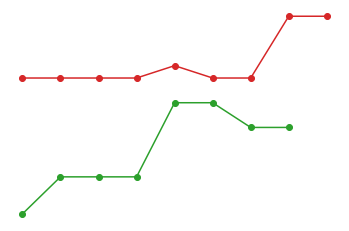

Accumulated cost matrix and optimal warping path for different local weights:


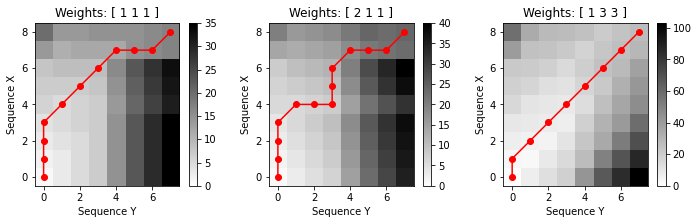

In [19]:
X = np.array([1, 1, 1, 1, 2, 1, 1, 6, 6])
Y = np.array([0, 3, 3, 3, 9, 9, 7, 7])
plt.figure(figsize=(6, 4))
plt.plot(np.arange(X.shape[0]), X + 10, '-o', c='C3')
plt.plot(np.arange(Y.shape[0]), Y, '-o', c='C2')
plt.axis('off')
plt.show()

print(r'Accumulated cost matrix and optimal warping path for different local weights:')
plt.figure(figsize=(10, 3))

ax = plt.subplot(1, 3, 1)
weights_mul = np.array([1, 1, 1])
title='Weights: '+'[ '+''.join(str(s)+' ' for s in weights_mul)+']'
compute_plot_D_P(X, Y, ax=ax, weights_mul=weights_mul, title=title)

ax = plt.subplot(1, 3, 2)
weights_mul = np.array([2, 1, 1])
title='Weights: '+'[ '+''.join(str(s)+' ' for s in weights_mul)+']'
compute_plot_D_P(X, Y, ax=ax, weights_mul=weights_mul, title=title)

ax = plt.subplot(1, 3, 3)
weights_mul = np.array([1, 3, 3])
title='Weights: '+'[ '+''.join(str(s)+' ' for s in weights_mul)+']'                                                      
compute_plot_D_P(X, Y, ax=ax, weights_mul=weights_mul, title=title)

plt.tight_layout()

### 3. Global Constraints

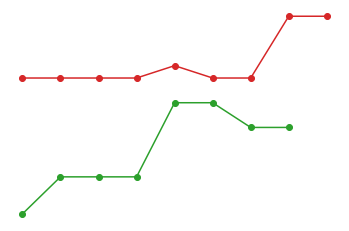

Accumulated cost matrix and optimal warping path for different constraint regions:


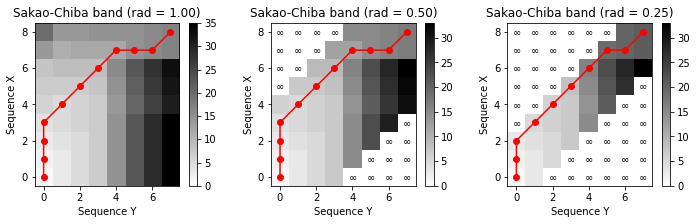

In [20]:
X = np.array([1, 1, 1, 1, 2, 1, 1, 6, 6])
Y = np.array([0, 3, 3, 3, 9, 9, 7, 7])
plt.figure(figsize=(6, 4))
plt.plot(np.arange(X.shape[0]), X + 10, '-o', c='C3')
plt.plot(np.arange(Y.shape[0]), Y, '-o', c='C2')
plt.axis('off')
plt.show()


print(r'Accumulated cost matrix and optimal warping path for different constraint regions:')
plt.figure(figsize=(10, 3))
global_constraints = True

ax = plt.subplot(1, 3, 1)
band_rad = 1
title='Sakao-Chiba band (rad = %.2f)'%band_rad
compute_plot_D_P(X, Y, ax=ax, global_constraints=global_constraints, band_rad=band_rad,title=title)

ax = plt.subplot(1, 3, 2)
band_rad = 0.5
title='Sakao-Chiba band (rad = %.2f)'%band_rad
compute_plot_D_P(X, Y, ax=ax, global_constraints=global_constraints, band_rad=band_rad,title=title)

ax = plt.subplot(1, 3, 3)
band_rad = 0.25
title='Sakao-Chiba band (rad = %.2f)'%band_rad
compute_plot_D_P(X, Y, ax=ax, global_constraints=global_constraints, band_rad=band_rad,title=title)

plt.tight_layout()